<a href="https://colab.research.google.com/github/Agustin-y/Coderhouse_DataScience1/blob/main/Proyecto_ParteII_%2BYebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final
# "Análisis de calidad de vinos"

### Autor: Juan Agustín Yebra

**RESUMEN**

En el presente trabajo se utilizó un dataset donde estan documentadas características de 6497 vinos distintos, las caracteristicas seleccionadas para utilizar posteriormente en el modelo de predicción son: 'acidez volatil', 'cloruros', 'densidad'y 'alcohol', ya que son las que encontramos mejor relacionadas con la calidad del vino, que es la variable seleccionada para determinar si un vino es 'malo', 'bueno' o 'regular'. Este modelo de división me parecio el mas adecuado para clasificarlos.
Como veremos al final en las conclusiones, el modelo usado de regresion lineal no nos dio la precisión necesaria como para considerar el modelo como exitoso.




**OBJETIVO**

En el dataset trabajado vamos a observar las caracterÍsticas de distintos vinos con el objetivo de predecir cual será su calidad basándonos en las características observadas

**CONTEXTO COMERCIAL**

La empresa productora de vinos quiere aumentar el precio de los vinos de mayor calidad, y ver la posibilidad de darle un precio mas accesible a los vinos de menor calidad. Busca una forma de predecir cual es la calidad de cada uno de los vinos para tomar decisiones en base a eso, sin necesidad de utilizar catadores

In [94]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import boxplot, distplot
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

In [95]:
# Creación del dataframe utilizando la data
df = pd.read_csv('calidad_de_vino.csv', index_col=0)

In [96]:
# Muestra de la base de datos
df.head()

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,color,calidad
botella_id,,,,,,,,,,,,,
0,9.5,0.56,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8,rojo,7
1,6.6,0.24,0.28,1.8,0.028,39.0,132.0,0.99182,3.34,0.46,11.4,blanco,5
2,9.4,0.59,0.14,2.0,0.084,25.0,48.0,0.99810,3.14,0.56,9.7,rojo,5
3,6.1,0.32,0.33,10.7,0.036,27.0,98.0,0.99521,3.34,0.52,10.2,blanco,6
4,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,blanco,6


### Definición de cada columna
botella_id: indice, numero indicador para distinguir cada botella de vino
distinta

acidez fija: Nivel de ácidos que no se evaporan fácilmente.

acidez volatil: Nivel de ácidos que se evaporan rápidamente.

acido citrico: Su presencia añade frescura al vino.

azucar residual: Cantidad de azúcar que queda después de la fermentación.

cloruros: Cantidad de sal en el vino, relacionada con su sabor.

dioxido de azufre libre: Protege el vino de la oxidación y bacterias.

dioxido de azufre total: Cantidad total en el vino, incluyendo el combinado y el libre.

densidad: Relación entre la masa del vino y su volumen.

pH	: Nivel de acidez o alcalinidad del vino.

sulfatos: Contribuyen a la conservación del vino y realzan su sabor.

alcohol	: Porcentaje de alcohol en el vino.

color: Intensidad del color del vino.

calidad : Evaluación final de la calidad del vino.

In [97]:
# Uso el método .info y .describe para obtener algunos datos del dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acidez fija              6497 non-null   float64
 1   acidez volatil           6497 non-null   float64
 2   acido citrico            6497 non-null   float64
 3   azucar residual          6497 non-null   float64
 4   cloruros                 6497 non-null   float64
 5   dioxido de azufre libre  6497 non-null   float64
 6   dioxido de azufre total  6497 non-null   float64
 7   densidad                 6497 non-null   float64
 8   pH                       6497 non-null   float64
 9   sulfatos                 6497 non-null   float64
 10  alcohol                  6497 non-null   float64
 11  color                    6497 non-null   object 
 12  calidad                  6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Podemos ver que la data no posee valores nulos, las 6497 filas con las que cuenta estan completas en las 13 columnas.

Los valores maximos tanto de dioxido de azufre libre como total son muy inusuales por lo tanto se debe tratar de un error de tipeo en la carga de los datos, los voy a reemplazar por la mediana para mantener la integridad de la data

En cuanto a la calidad final de los vinos vemos que la calificacion minima es 3 y el maximo encontrado es de 9, con una media de 5,8 para toda la muestra. Un vino que obtenga una clasificacion de 7, estara en el 25% mejor calificado





In [98]:
# Reemplazo los valores de dioxido de azufre libre mayores a 90 por la mediana
median_dioxido_libre = df['dioxido de azufre libre'].median()
df.loc[df['dioxido de azufre libre'] > 90, 'dioxido de azufre libre'] = median_dioxido_libre


In [99]:
# Reemplazo los valores de dioxido de azufre total mayores a 300 por la mediana
median_dioxido_total = df['dioxido de azufre total'].median()
df.loc[df['dioxido de azufre total'] > 300, 'dioxido de azufre total'] = median_dioxido_total

In [100]:
# Verifico que los cambios fueron realizados correctamente
df.describe()

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.176081,115.534324,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,16.730712,56.069126,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,89.000000,294.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Hipótesis 1
La calidad de un vino no se ve afectada por su nivel de pH

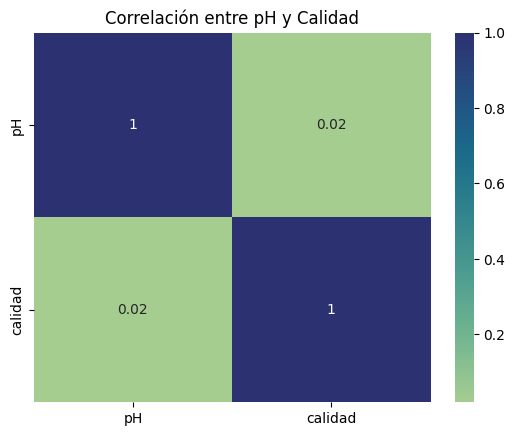

Correlación entre pH y calidad: 0.019505703714435812


In [101]:
# Realizo un gráfico de correlación entre el nivel de pH y la calidad para comprobar la hipótesis
correlacion = df['pH'].corr(df['calidad'])
sns.heatmap(df[['pH', 'calidad']].corr(), annot=True, cmap='crest')
plt.title('Correlación entre pH y Calidad')
plt.show()
print("Correlación entre pH y calidad:", correlacion)

La hipótesis es verdadera, en este gráfico se puede ver una correlación entre el nivel de pH y la calidad del vino casi nula, quiere decir que la calidad de un vino no se ve afectada por el nivel de pH que posea

## Hipótesis 2
El dioxido de azufre total en un vino es indistinto segun su color



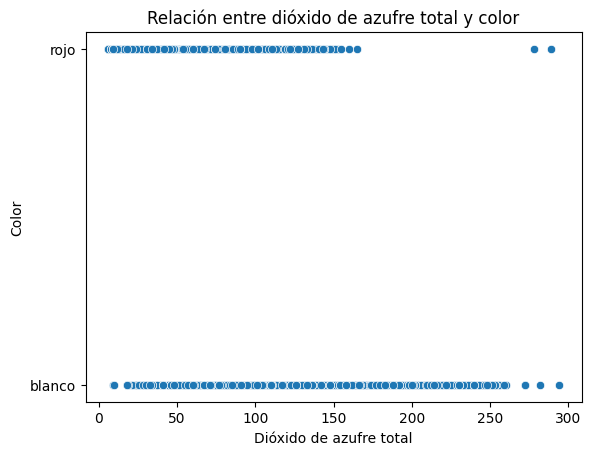

In [102]:
# Realizo un gráfico de dispersión entre el dioxido de azufre total y el color del vino para corroborar la hipótesis
sns.scatterplot(x='dioxido de azufre total', y='color', data=df)
plt.xlabel('Dióxido de azufre total')
plt.ylabel('Color')
plt.title('Relación entre dióxido de azufre total y color')
plt.show()


La hipótesis es falsa ya que podemos ver en el gráfico como los vinos de color rojo tienen niveles mas bajos de dioxido de azufre total que los vinos blancos

## Hipótesis 3
Los vinos tintos tienen una mejor calidad que los vinos blancos.

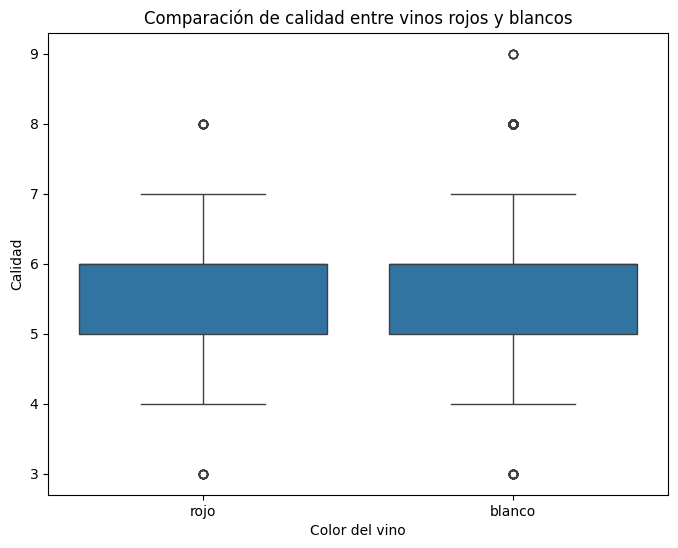

In [103]:
# Realizo un Boxplot comparativo entre el color y la calidad.
plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='calidad', data=df)
plt.xlabel('Color del vino')
plt.ylabel('Calidad')
plt.title('Comparación de calidad entre vinos rojos y blancos')
plt.show()


La hipótesis es falsa, no hay una diferencia notoria entre la calidad de los vinos si los distinguimos por su color, además podemos observar hay uno que destaca con una calidad de 9 que es de color blanco

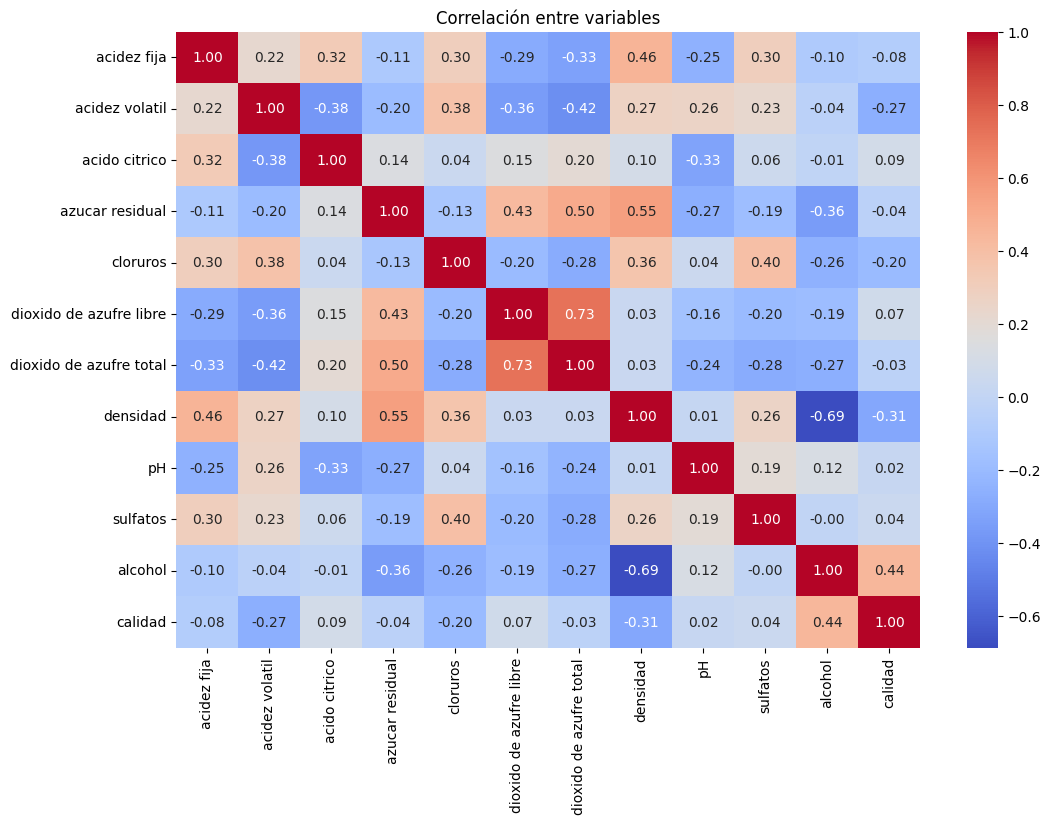

In [104]:
# Confecciono un gráfico de calor para comprender como estan relacionadas entre si todas las variables
columnas_correlacion = df.drop('color', axis=1)
correlation_matrix = columnas_correlacion.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables')
plt.show()


### Modelo de Machine Learning de clasificación

En el siguiente modelo voy a seleccionar las variables que esten más relacionadas con la calidad del vino para intentar predecir cual sera la calidad del vino observando esas caracteristicas. Gracias a los analisis previos podemos observar que dichas variables son: acidez volatil, cloruros, densidad y alcohol. Los vinos seran divididos en 3 categorias, las cuales serán, 'malos' si poseen una calidad entre 3 y 5, 'regulares' si tienen una calidad de 6 y 'buenos' si alcanzan una calidad de 7 o superior.

In [105]:
# Importo las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [106]:
# Creo una nueva columna llamada 'Clasificacion' para facilitar la clasificación de los vinos en categorías definidas
df['Clasificacion'] = pd.cut(df['calidad'], bins=[2, 5, 6, 10], labels=['Malos', 'Regulares', 'Buenos'])

In [107]:
# Selecciono las variables para el modelo, como 'x' las que serán utilizadas por el modelo para predecir su calidad y posterior clasificación
# Selecciono como 'y' la columna Clasificación, que es la variable dependiente que el modelo intentará predecir
X = df[['acidez volatil', 'cloruros', 'densidad', 'alcohol']]
y = df['Clasificacion']

In [108]:
# Divido el conjunto de datos en dos partes, uno para entrenar el modelo y otro para evaluar su rendimiento.
# Utilizo el 70% de los datos para el entrenamiento y el 30% restante como conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
# Compruebo que los datos de los conjuntos de entrenamiento y prueba se dividieron correctamente
print("Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de prueba:", X_test.shape, y_test.shape)

Conjunto de entrenamiento: (4547, 4) (4547,)
Conjunto de prueba: (1950, 4) (1950,)


Los conjuntos de entrenamiento y prueba se dividieron de forma adecuada con la proporción establecida en el paso anterior, el conjunto de entrenamiento tiene 4547 muestras y 4 características, mientras que el conjunto de prueba tiene 1950 muestras y las mismas características

In [110]:
# Verifico que porcentaje de los vinos pertenecen a cada una de las categorías de clasificación
y.value_counts(normalize=True).round(2)*100

,proportion
Clasificacion,
Regulares,44.0
Malos,37.0
Buenos,20.0


### Regresion logistica
Creo un modelo de Regresión Logística para predecir las probabilidades de pertenencia de los vinos a diferentes categorías de clasifición

In [111]:
# Creo el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [112]:
# Hago las predicciones en el conjunto de prueba
y_pred_train = modelo.predict(X_train)
y_pred = modelo.predict(X_test)

In [113]:
# Evalúo el modelo de entrenamiento
print('Precisión del modelo de entrenamiento:', accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Matriz de Confusión (Entrenamiento):\n", confusion_matrix(y_train, y_pred_train))


Precisión del modelo de entrenamiento: 0.54915328788212
              precision    recall  f1-score   support

      Buenos       0.52      0.27      0.35       895
       Malos       0.61      0.64      0.62      1660
   Regulares       0.51      0.60      0.55      1992

    accuracy                           0.55      4547
   macro avg       0.55      0.50      0.51      4547
weighted avg       0.55      0.55      0.54      4547

Matriz de Confusión (Entrenamiento):
 [[ 238   90  567]
 [  22 1063  575]
 [ 202  594 1196]]


**Descripción:**

El modelo de entrenamiento alcanzo una precisión general de aproximadamente 54.92%. Esta precisión es un poco inferior a la obtenida en el conjunto de prueba.

En los vinos clasificados como "Buenos" la precisión de 0.52 indica que el 52% de las instancias clasificadas como "Buenos" son correctas. El recall de 0.27 sugiere que solo el 27% de los vinos realmente buenos fueron identificados correctamente. El F1-score de 0.35 refleja un desempeño limitado en esta clase.

Para los vinos clasificados como "Malos", el modelo muestra un rendimiento más equilibrado en esta clase, con una precisión de 61% y recall de 64%. Esto indica que el modelo es relativamente efectivo para identificar vinos de calidad "Malos".

Por último, en cuanto a los "Regulares" la precisión de 0.51 indica que el modelo acierta prácticamente solo la mitad de las veces en clasificar vinos como "Regulares", y el recall de 0.60 muestra que se identifican correctamente el 60% de los vinos de esta categoría.


In [114]:
# Evalúo el modelo de testeo
print('Precisión del modelo:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Precisión del modelo: 0.5512820512820513
              precision    recall  f1-score   support

      Buenos       0.56      0.30      0.39       382
       Malos       0.61      0.62      0.61       724
   Regulares       0.51      0.61      0.56       844

    accuracy                           0.55      1950
   macro avg       0.56      0.51      0.52      1950
weighted avg       0.55      0.55      0.54      1950

Matriz de Confusión:
 [[113  42 227]
 [ 10 448 266]
 [ 80 250 514]]


**Descripción:**

La precisión general del modelo indica que aproximadamente el 55.13% de las predicciones realizadas por el modelo fueron correctas, siendo mejores que la del modelo de entrenamiento pero por un margen mínimo. Aunque este valor puede ser un punto de partida, sugiere que el modelo tiene un amplio margen para mejorar.

En los vinos "Buenos" la precisión de 0.56 muestra que, de todos los vinos clasificados de esta manera, solo un poco mas de la mitad, el 56% eran realmente buenos. El recall de 0.30 nos dice que solo el 30% de los vinos realmente buenos fueron identificados como tales. El F1-score de 0.39, que combina precisión y recall, muestra que el modelo tiene un desempeño bastante limitado en esta clase.

Para los vinos "Malos" al igual que en el modelo de entrenamiento, esta clase muestra un rendimiento más equilibrado, con una precisión de 61% y un recall muy parecido de 62%. Esto nos sigue demostrando que el modelo es algo efectivo para identificar vinos de calidad "Malos".

Para terminar, en los vinos "Regulares" la precisión de 0.51 indica que el modelo acierta practicamente la mitad de las veces que clasifica vinos como "Regulares". Sin embargo, el recall de 0.61 muestra que se están identificando correctamente más vinos de esta clase.




## Conclusiones

El modelo tiene un rendimiento moderado, recomiendo seguir utilizando otros métodos para identificar la calidad de un vino, como las catas, las características que encontramos en el dataset no nos alcanzan para hacer un modelo de machine learning que nos pueda ubicar con precisión cada vino en su clasificación adecuada, ubicando de forma incorrecta prácticamente la mitad de la muestra. Lo que nos da un resultado no deseado para utilizar de forma efectiva este modelo.

Por otro lado, al continuar el trabajo hay potencial para mejorar, especialmente en la clasificación de las clases "Buenos" y "Regulares". La clase "Malos" es la que mas precisión obtuvo pero de todas formas un 61% de precisión en testeo sigue siendo bajo como para asegurar que el modelo se puede utilizar sin problemas.


La clase "Regulares" tiene un recall que es superior a la precisión, seguramente se deba a que es la categoría que más cantidad de vinos tiene, y no por una cuestión de que el modelo tenga una buena precisión con este tipo de vinos, ya que como vimos su precisión de testeo es de solo el 51%.

Rendimiento del Modelo de Entrenamiento:

El modelo tiene un mejor rendimiento en la identificación de la clase "Malos" con un F1-score de 0.62, mientras que demuestra grandes dificultades en la clase "Buenos", que tiene un F1-score de solo 0.35. Esto destaca la necesidad de ajustar el modelo para mejorar la identificación de vinos de calidad alta.

La matriz de confusión indica que la clase "Malos" es la que se clasifica con mayor precisión, mientras que las clases "Buenos" y "Regulares" tienen un mayor número de falsos positivos y negativos. Esto sugiere un desbalance en los datos, que podría ser un factor limitante en el rendimiento del modelo.

**RECOMENDACIONES**

Se sugiere explorar técnicas de ajuste de clases, como el sobremuestreo de la clase "Buenos" o la utilización de algoritmos de aprendizaje que manejan mejor el desbalance de clases, como Random Forest.
También es recomendable ajustar hiperparámetros del modelo y probar diferentes algoritmos para mejorar el rendimiento general y, en particular, el reconocimiento de la clase "Buenos".